# mva-assignment_healthdata

Use the "Run" button to execute the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install pandas openpyxl

!pip install jovian --upgrade -q
import jovian

In [2]:
data_dir = './work'
import os
os.listdir(data_dir)

['wcgs MVA original data.xlsx']

In [3]:
wcgs = pd.read_excel(data_dir + '/wcgs MVA original data.xlsx')
wcgs.head()

,age,bmi,chol,dbp,height,ncigs,sbp,smoke,weight
0,50.0,31.321007,249.0,90.0,67.0,25.0,132.0,Yes,200.0
1,51.0,25.328579,194.0,74.0,73.0,25.0,120.0,Yes,192.0
2,59.0,28.693878,258.0,94.0,70.0,0.0,158.0,No,200.0
3,51.0,22.148708,173.0,80.0,69.0,0.0,126.0,No,150.0
4,44.0,22.313034,214.0,80.0,71.0,0.0,126.0,No,160.0


In [4]:
# To see the dimension of the dataset wcgs
wcgs.shape

(3154, 9)

In [5]:
wcgs.dtypes

age       float64
bmi       float64
chol      float64
dbp       float64
height    float64
ncigs     float64
sbp       float64
smoke      object
weight    float64
dtype: object

In [6]:
wcgs.columns

Index(['age', 'bmi', 'chol', 'dbp', 'height', 'ncigs', 'sbp', 'smoke',
       'weight'],
      dtype='object')

In [7]:
# To see a random sample of the data
wcgs.sample(5)

,age,bmi,chol,dbp,height,ncigs,sbp,smoke,weight
2452,56.0,19.942245,223.0,84.0,70.0,37.0,128.0,Yes,139.0
37,50.0,26.496727,192.0,80.0,71.0,0.0,130.0,No,190.0
1167,42.0,22.044767,244.0,80.0,68.0,16.0,110.0,Yes,145.0
1164,50.0,24.363579,279.0,78.0,69.0,15.0,114.0,Yes,165.0
1366,59.0,24.389795,231.0,102.0,70.0,0.0,168.0,No,170.0


In [8]:
# To check the numerical measures of each column
wcgs.describe()

,age,bmi,chol,dbp,height,ncigs,sbp,weight
count,3154.000000,3154.000000,3142.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000
mean,46.278694,24.518375,226.372374,82.015536,69.777743,11.600507,128.632847,169.953710
std,5.524045,2.567496,43.420426,9.726880,2.528693,14.517579,15.117731,21.095762
min,39.000000,11.190612,103.000000,58.000000,60.000000,0.000000,98.000000,78.000000
25%,42.000000,22.955103,197.250000,76.000000,68.000000,0.000000,120.000000,155.000000
50%,45.000000,24.389795,223.000000,80.000000,70.000000,0.000000,126.000000,170.000000
75%,50.000000,25.840160,253.000000,86.000000,72.000000,20.000000,136.000000,182.000000
max,59.000000,38.947369,645.000000,150.000000,78.000000,99.000000,230.000000,320.000000


### Data cleaning

In [9]:
# To see the inforamtion about each column
wcgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3154 non-null   float64
 1   bmi     3154 non-null   float64
 2   chol    3142 non-null   float64
 3   dbp     3154 non-null   float64
 4   height  3154 non-null   float64
 5   ncigs   3154 non-null   float64
 6   sbp     3154 non-null   float64
 7   smoke   3154 non-null   object 
 8   weight  3154 non-null   float64
dtypes: float64(8), object(1)
memory usage: 221.9+ KB


In [10]:
wcgs.isna().sum()

age        0
bmi        0
chol      12
dbp        0
height     0
ncigs      0
sbp        0
smoke      0
weight     0
dtype: int64

In [11]:
mean_chol = wcgs.chol.mean()
mean_chol

226.3723742838956

In [12]:
wcgs.fillna(value=wcgs['chol'].mean(), inplace=True)

In [13]:
wcgs.isnull().sum()

age       0
bmi       0
chol      0
dbp       0
height    0
ncigs     0
sbp       0
smoke     0
weight    0
dtype: int64

In [14]:
# To check if there if any duplication in rows
wcgs.duplicated().sum()

0

In [15]:
# To check the relevant columns
wcgs.corr()

,age,bmi,chol,dbp,height,ncigs,sbp,weight
age,1.000000,0.026630,0.088929,0.139198,-0.095376,-0.005034,0.165746,-0.034405
bmi,0.026630,1.000000,0.070382,0.342431,-0.065815,-0.107058,0.287789,0.806636
chol,0.088929,0.070382,1.000000,0.128152,-0.088508,0.095676,0.122298,0.008515
dbp,0.139198,0.342431,0.128152,1.000000,0.010276,-0.059342,0.772906,0.295920
height,-0.095376,-0.065815,-0.088508,0.010276,1.000000,0.014911,0.018374,0.532935
ncigs,-0.005034,-0.107058,0.095676,-0.059342,0.014911,1.000000,0.029978,-0.081748
sbp,0.165746,0.287789,0.122298,0.772906,0.018374,0.029978,1.000000,0.253250
weight,-0.034405,0.806636,0.008515,0.295920,0.532935,-0.081748,0.253250,1.000000


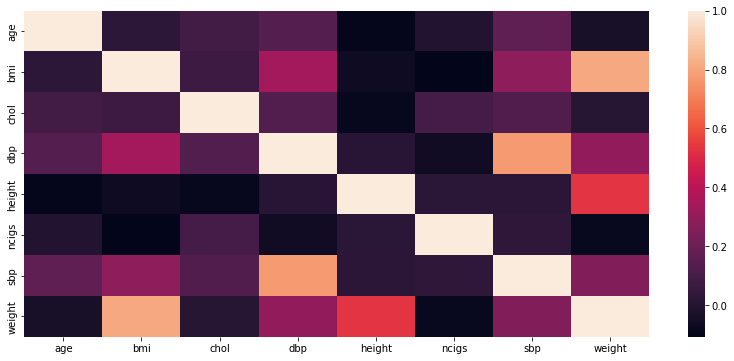

In [16]:
corr= wcgs.corr()
plt.figure(figsize=[14,6])
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns)
plt.show()

In [17]:
wcgs.corr()['sbp']

age       0.165746
bmi       0.287789
chol      0.122298
dbp       0.772906
height    0.018374
ncigs     0.029978
sbp       1.000000
weight    0.253250
Name: sbp, dtype: float64

### 1. Create a frequency distribution characterising the age of the sample and summarise the measures of central tendency. Describe the results emerging from the analysis.

In [18]:
maxage = wcgs.age.max()
minage = wcgs.age.min()
rangeage= maxage - minage
avgage= wcgs.age.mean()
medianage= wcgs.age.median()
modeage= wcgs.age.mode().tolist()
sdage= wcgs.age.std()
skewage= wcgs.age.skew()


In [19]:
print('max of age ',maxage)
print('min of age ',minage)
print('range of age ',rangeage)
print('average of age ', round(avgage, 2))
print('median of age ',medianage)
print('mode of age ',modeage)
print('standard deviation of age ',round(sdage, 3))
print('skewness of age ',round(skewage, 3))

max of age  59.0
min of age  39.0
range of age  20.0
average of age  46.28
median of age  45.0
mode of age  [40.0]
standard deviation of age  5.524
skewness of age  0.527


In [20]:
bins = [37, 40, 43, 46, 49, 52, 55, 58, 61]
labels = ['37-39','40-42','43-45','46-48','49-51','52-54','55-57','58-60']
df = pd.DataFrame()
df['Age Interval'] = pd.cut(wcgs['age'], bins=bins, labels=labels, include_lowest=True)
freq_table = pd.value_counts(df['Age Interval']).sort_index()

# Calculate the percentage of individuals in each age interval
percentage = freq_table / freq_table.sum() * 100

print(pd.concat([freq_table, round(percentage,2)], axis=1, keys=['Frequency', 'Percentage']))

       Frequency  Percentage
37-39        543       17.22
40-42        670       21.24
43-45        591       18.74
46-48        445       14.11
49-51        371       11.76
52-54        292        9.26
55-57        195        6.18
58-60         47        1.49


In [21]:
def create_bins(lower_bound, width, quantity):
    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [22]:
bins1 = create_bins(lower_bound=37,
                   width=3,
                   quantity=7)

bins1

[(37, 40),
 (40, 43),
 (43, 46),
 (46, 49),
 (49, 52),
 (52, 55),
 (55, 58),
 (58, 61)]

In [23]:
bins2 = pd.IntervalIndex.from_tuples(bins1)

In [24]:
categorical_age = pd.cut(wcgs.age, bins2)
print(categorical_age)

0       (49, 52]
1       (49, 52]
2       (58, 61]
3       (49, 52]
4       (43, 46]
          ...   
3149    (46, 49]
3150    (40, 43]
3151    (52, 55]
3152    (52, 55]
3153    (46, 49]
Name: age, Length: 3154, dtype: category
Categories (8, interval[int64, right]): [(37, 40] < (40, 43] < (43, 46] < (46, 49] < (49, 52] < (52, 55] < (55, 58] < (58, 61]]


<AxesSubplot:xlabel='age', ylabel='count'>

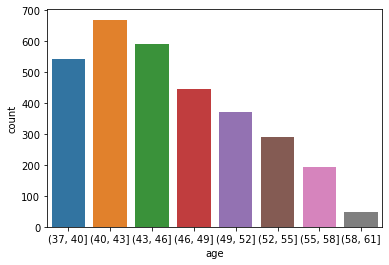

In [25]:
sns.countplot(x=categorical_age)

OBSERVATIONS:

This output shows the frequency distribution table and measures of central tendency for the age variable. We can see that the sample is skewed towards younger ages, with the highest frequency in the 40-43 age interval. The mean and median age are close to each other i.e. 46 and 45, indicating that the distribution is right skewed. 

### 2. Does the variable Systolic Blood Pressure (sbp) represent the characteristics of a normally distributed variable? If yes, please justify how do you arrive at this conclusion and if No, how it can be transformed to a normally distributed variable.

In [26]:
print(round(wcgs.sbp.mean(),2))

128.63


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sbp', ylabel='Density'>

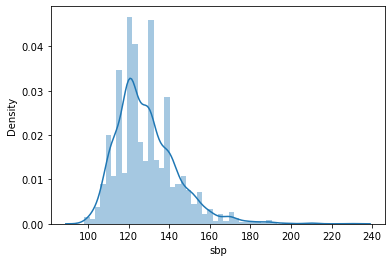

In [27]:
sns.distplot(wcgs.sbp)
#sns.displot(data=wcgs, x="sbp")

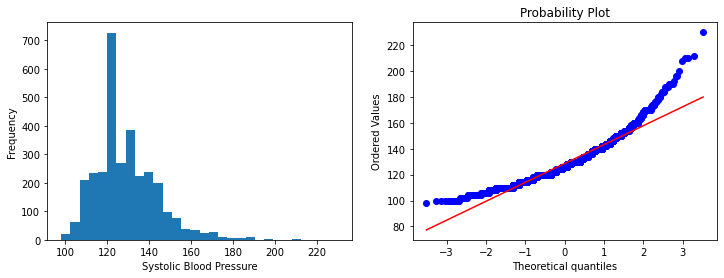

In [28]:
from scipy.stats import probplot

# Plot histogram and normal probability plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sbp = wcgs.sbp
axes[0].hist(sbp, bins=30)
axes[0].set_xlabel('Systolic Blood Pressure')
axes[0].set_ylabel('Frequency')

probplot(sbp, plot=axes[1])
plt.show()

OBSERVATIONS: 

I can see that the sbp variable is not normally distributed. The bell-shaped curve is shifted left and it is right skewed. 
The normal probability plot also shows that the sbp points on this plot clearly don’t fall along the red line, so I would not assume that this sbp dataset is normally distributed.

I can use the Shapiro-Wilk test, which tests the null hypothesis that the data is normally distributed if p value is more than 0.05 (95% confidence interval)

In [29]:
from scipy.stats import shapiro

stat, p = shapiro(sbp)
print('Test statistic =', round(stat, 3))
print('p-value = ', p)

Test statistic = 0.932
p-value =  1.1776258670374108e-35


As p-value is very very small so I can reject the null hypothesis and say that the data is NOT normally distributed.

To make it normally distributed I can take natural logarithm of sbp and consider that.

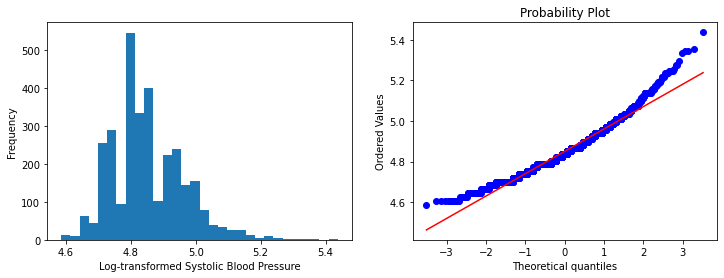

In [30]:
# Transform sbp variable using natural logarithm
sbp_log = np.log(wcgs.sbp)

# Plot histogram and normal probability plot of transformed variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].hist(sbp_log, bins=30)
axes[0].set_xlabel('Log-transformed Systolic Blood Pressure')
axes[0].set_ylabel('Frequency')
probplot(sbp_log, plot=axes[1])
plt.show()

In [31]:
stat, p = shapiro(sbp_log)
print('Test statistic =', round(stat, 3))
print('p-value = ', p)

Test statistic = 0.968
p-value =  7.941036254933041e-26


Though the shapiro-wilk test gives p value very small than 0.05 but From the histogram, I can see that the log-transformed sbp variable is approximately normally distributed, with a bell-shaped curve and not apparent skewness. The normal probability plot also shows that the log-transformed sbp variable follows a roughly straight line, indicating that it is consistent with a normal distribution.

### 3. It is assumed that Systolic Blood Pressure (sbp) varies positively with the Body Mass Index (bmi). Examine this hypothesis and create a graph to display the relationship.

To examine the hypothesis that Systolic Blood Pressure (sbp) varies positively with the Body Mass Index (bmi), I can calculate the correlation coefficient between the two variables. 

Then create a scatter plot of sbp vs. bmi

In [32]:
cor_sbp_bmi = wcgs.corr()['sbp']['bmi']
print('Correlation coefficient between SBP and BMI:', round(cor_sbp_bmi, 3))

Correlation coefficient between SBP and BMI: 0.288


In [33]:
wcgs['highSBP'] = np.where(wcgs['sbp']>150, 1, 0)

<AxesSubplot:xlabel='sbp', ylabel='bmi'>

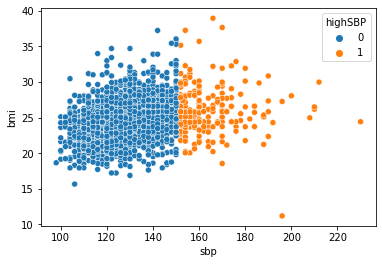

In [34]:
sns.scatterplot(data=wcgs, x='sbp', y='bmi', hue='highSBP')

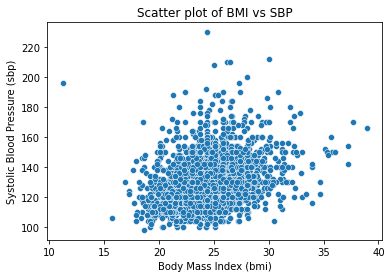

In [35]:
sns.scatterplot(data=wcgs, x='bmi', y='sbp')
plt.xlabel('Body Mass Index (bmi)')
plt.ylabel('Systolic Blood Pressure (sbp)')
plt.title('Scatter plot of BMI vs SBP')
plt.show()

The scatter plot shows a positive correlation between bmi and sbp, with higher values of bmi generally associated with higher values of sbp. The correlation coefficient of 0.288 indicates a good positive correlation between sbp and bmi.

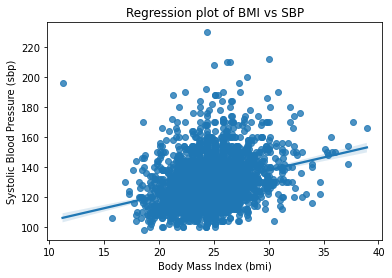

In [36]:
sns.regplot(data=wcgs, x='bmi', y='sbp')
plt.xlabel('Body Mass Index (bmi)')
plt.ylabel('Systolic Blood Pressure (sbp)')
plt.title('Regression plot of BMI vs SBP')
plt.show()

The regression line shows the overall trend of the positive relationship between bmi and sbp, with higher values of bmi associated with higher values of sbp. This supports the hypothesis that sbp varies positively with bmi or vice-versa.

### 4. Draw box-plots for the variables Systolic Blood Pressure (sbp) and Diastolic Blood Pressure (dbp). From these graphs what do you conclude about the following: (i) Location and Spread, (ii) Interquartile Range, and (iii) Range of Observations and outliers.

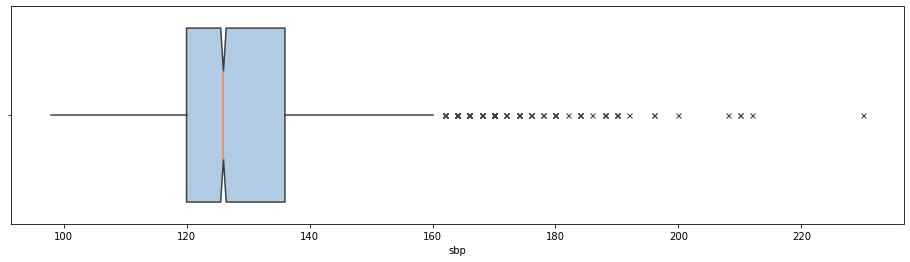

In [37]:
plt.figure(figsize=[16,4])
sns.boxplot(
    data=wcgs, x="sbp",    notch=True, showcaps=False,    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},    medianprops={"color": "coral"})
plt.show()

* From the boxplot I can observe that the median (middle line in the box) of sbp is around 126
* The spread (width of the box) of sbp is slightly larger 95 to 160 (0 to 100 percentile)
* The interquartile range (height of the box) for sbp is bigger, indicating that the middle 50% of values for sbp are more spread out from 120-136.
* The range (distance from the lowest to the highest value) for sbp is much larger 95 to 230, indicating that sbp has a wider range of values.
* There are several outliers in the sbp box-plot, indicated by the crosses beyond the whiskers. The outliers in the sbp box-plot suggest that there are some individuals with extremely high values of sbp in this sample.


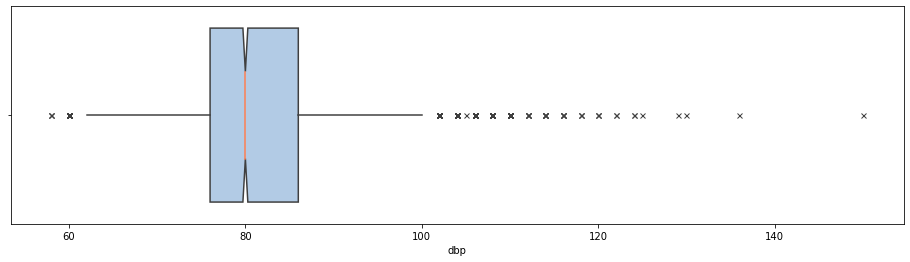

In [38]:
plt.figure(figsize=[16,4])
sns.boxplot(
    data=wcgs, x="dbp",    notch=True, showcaps=False,    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},    medianprops={"color": "coral"})
plt.show()

* From the boxplot I can observe that the median (middle line in the box) of dbp is around 80
* The spread (width of the box) of dbp is slightly smaller i.e. 62-100 (0 to 100 percentile)
* The interquartile range (height of the box) for dbp is lesser, indicating that the middle 50% of values for dbp are less spread out from 75-86.
* The range (distance from the lowest to the highest value) for dbp is less 59 to 150, indicating that dbp has a narrower range of values.
* There are several outliers in the dbp box-plot, indicated by the crosses beyond the whiskers. The outliers in the dbp box-plot suggest that there are one to two individuals with extremely less values of dbp in this sample.

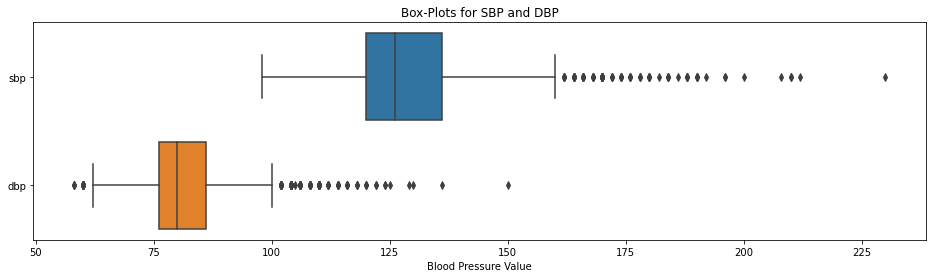

In [39]:
plt.figure(figsize=[16,4])
sns.boxplot(data=wcgs[['sbp', 'dbp']], orient="h")
plt.xlabel('Blood Pressure Value')
plt.title('Box-Plots for SBP and DBP')
plt.show()

* The spread of sbp is slightly larger than that of dbp, indicating that sbp has more variability in values than dbp.
* The interquartile range for sbp is larger than that for dbp, indicating that the middle 50% of values for sbp are more spread out than those for dbp.
* The range of observation for sbp is much larger than that for dbp, indicating that sbp has a wider range of values than dbp.

### 5. The data consists of a categorical variable Current Smoking (smoke) that is coded in two categories (Yes and No). Create a box-plots for Total Cholesterol (chol), Diastolic Blood Pressure (dbp) and Systolic Blood Pressure (sbp) by the categorical variable. Explain the results that emerge from the analysis.

In [40]:
wcgs.sample(3)

,age,bmi,chol,dbp,height,ncigs,sbp,smoke,weight,highSBP
1520,44.0,23.053627,231.0,68.0,72.0,0.0,126.0,No,170.0,0
984,39.0,29.156057,233.0,82.0,72.0,0.0,122.0,No,215.0,0
659,55.0,27.213884,182.0,76.0,68.0,40.0,138.0,Yes,179.0,0


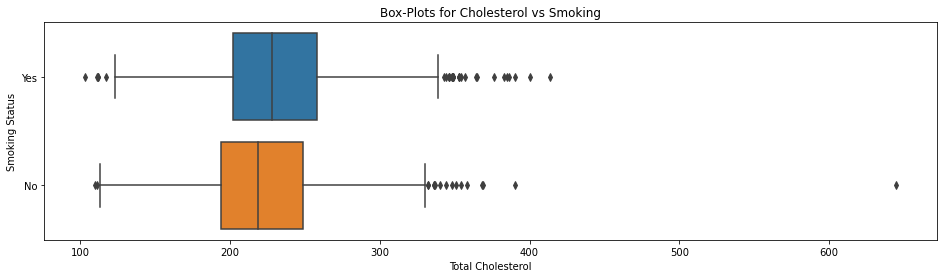

In [41]:
plt.figure(figsize=[16,4])
sns.boxplot(data=wcgs, x='chol', y='smoke')
plt.xlabel('Total Cholesterol')
plt.ylabel('Smoking Status')
plt.title('Box-Plots for Cholesterol vs Smoking')
plt.show()

* The median value of Cholesterol is higher in Smokers than in Non-smokers.
* The interquartile range for Cholesterol is almost same in Smokers and Non-smokers.
* There are some outliers in the Cholesterol box-plot for both smoking categories. There are some individuals with extremely high or low cholesterol levels in both groups. Number of outliers are more in Smoker group

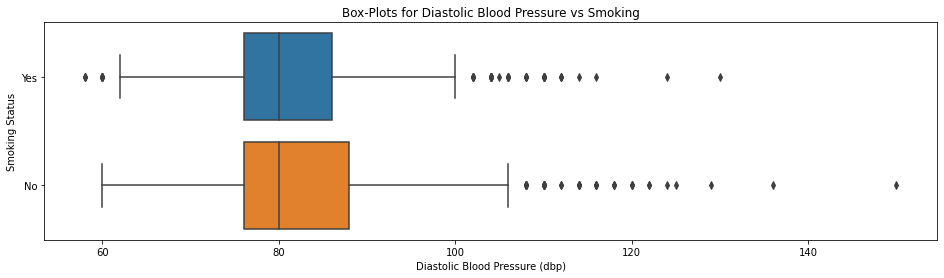

In [42]:
plt.figure(figsize=[16,4])
sns.boxplot(data=wcgs, x='dbp', y='smoke')
plt.xlabel('Diastolic Blood Pressure (dbp)')
plt.ylabel('Smoking Status')
plt.title('Box-Plots for Diastolic Blood Pressure vs Smoking')
plt.show()

* The median values of dbp are almost same in Smokers and Non-smokers.
* The interquartile range for dbp is surprisingly wider in Non-smokers than Smokers.
* There are some outliers in the dbp box-plot for both smoking category and both are having high dbp.

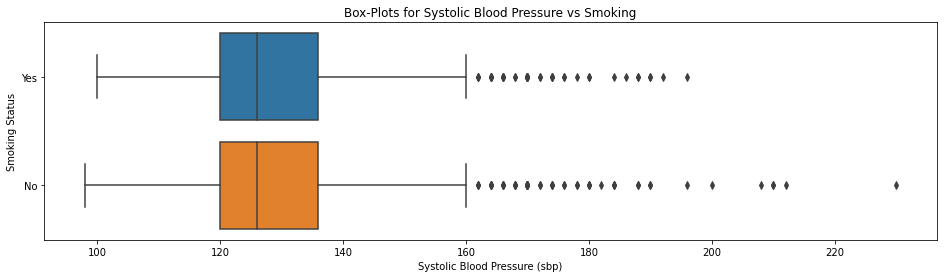

In [43]:
plt.figure(figsize=[16,4])
sns.boxplot(data=wcgs, x='sbp', y='smoke')
plt.xlabel('Systolic Blood Pressure (sbp)')
plt.ylabel('Smoking Status')
plt.title('Box-Plots for Systolic Blood Pressure vs Smoking')
plt.show()

* The median value of sbp is almost same in Smokers and Non-smokers.
* The interquartile range for sbp is same in Smokers and Non-smokers.
* There are some outliers in the sbp box-plot for both smoking categories, indicating that there are some individuals with extremely high systolic blood pressure levels in both groups. But there are no outliers with extremely less sbp.

### 6. It is hypothesised that smoking has a positive and linear impact on both Diastolic Blood Pressure (dbp) and Systolic Blood Pressure (sbp). How will you test this hypothesis? What do the results emerging from the test suggest about the nature of the relationship in the wcgs dataset? Hint: Thinks about the variable ncigs in the dataset that depicts the number of cigarettes smoked per day.

In [44]:
wcgs.shape

(3154, 10)

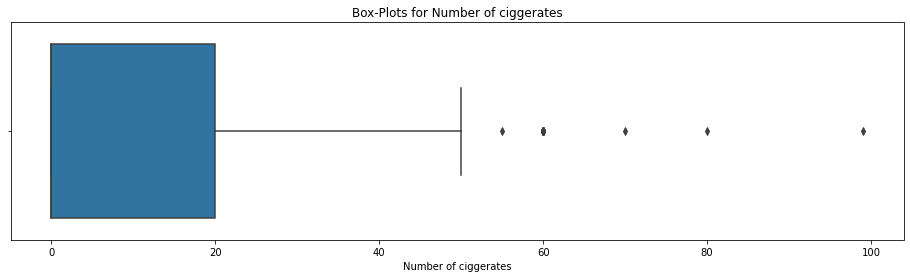

In [45]:
plt.figure(figsize=[16,4])
sns.boxplot(data=wcgs, x='ncigs')
plt.xlabel('Number of ciggerates')
plt.title('Box-Plots for Number of ciggerates')
plt.show()

In [46]:
wcgs_filtered = wcgs[wcgs['ncigs'] <= 50]

In [47]:
wcgs_filtered.shape

(3136, 10)

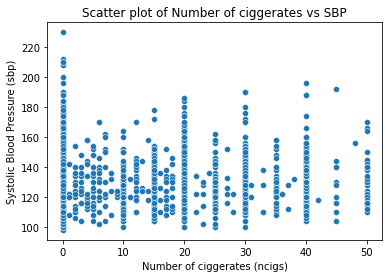

In [48]:
sns.scatterplot(data=wcgs_filtered, x='ncigs', y='sbp')
plt.xlabel('Number of ciggerates (ncigs)')
plt.ylabel('Systolic Blood Pressure (sbp)')
plt.title('Scatter plot of Number of ciggerates vs SBP')
plt.show()

In [49]:
wcgs_filtered.head(5)

,age,bmi,chol,dbp,height,ncigs,sbp,smoke,weight,highSBP
0,50.0,31.321007,249.0,90.0,67.0,25.0,132.0,Yes,200.0,0
1,51.0,25.328579,194.0,74.0,73.0,25.0,120.0,Yes,192.0,0
2,59.0,28.693878,258.0,94.0,70.0,0.0,158.0,No,200.0,1
3,51.0,22.148708,173.0,80.0,69.0,0.0,126.0,No,150.0,0
4,44.0,22.313034,214.0,80.0,71.0,0.0,126.0,No,160.0,0


In [50]:
wcgs_filtered = pd.get_dummies(wcgs_filtered, columns=['smoke'], drop_first=True)

In [51]:
wcgs_filtered.head(5)

,age,bmi,chol,dbp,height,ncigs,sbp,weight,highSBP,smoke_Yes
0,50.0,31.321007,249.0,90.0,67.0,25.0,132.0,200.0,0,1
1,51.0,25.328579,194.0,74.0,73.0,25.0,120.0,192.0,0,1
2,59.0,28.693878,258.0,94.0,70.0,0.0,158.0,200.0,1,0
3,51.0,22.148708,173.0,80.0,69.0,0.0,126.0,150.0,0,0
4,44.0,22.313034,214.0,80.0,71.0,0.0,126.0,160.0,0,0


In [52]:
X = wcgs_filtered[['ncigs','smoke_Yes']]
yd = wcgs_filtered.dbp
ys = wcgs_filtered.sbp

In [53]:
import statsmodels.api as sm

X= sm.add_constant(X)
est_d= sm.OLS(yd, X).fit()
est_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dbp   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     11.60
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           9.54e-06
Time:                        19:26:33   Log-Likelihood:                -11566.
No. Observations:                3136   AIC:                         2.314e+04
Df Residuals:                    3133   BIC:                         2.316e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.7851      0.238    347.787      0.000      82.318      83.252
ncigs          0.0220      0.024      0.930      0.352      -0.024       0.068
smoke_Yes     -2.1600      0.662     -3.265      0.001      -3.457      -0.863
==============================================================================
Omnibus:                      486.972   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1085.966
Skew:                           0.901   Prob(JB):                    1.53e-236
Kurtosis:                       5.251   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
est_s= sm.OLS(ys, X).fit()
est_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sbp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.565
Date:                Fri, 10 Mar 2023   Prob (F-statistic):             0.0105
Time:                        19:26:33   Log-Likelihood:                -12963.
No. Observations:                3136   AIC:                         2.593e+04
Df Residuals:                    3133   BIC:                         2.595e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.5950      0.372    346.020      0.000     127.866     129.324
ncigs          0.1113      0.037      3.020      0.003       0.039       0.184
smoke_Yes     -2.5995      1.033     -2.516      0.012      -4.625      -0.574
==============================================================================
Omnibus:                      700.697   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1779.026
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       5.793   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBSERVATIONS:

To test the hypothesis we can examine the variable ncigs and smoke in the dataset that depicts the number of cigarettes smoked per day and smoking status as the potential confounding variables. If ncigs and smoke is positively associated with both dbp and sbp then it could be potential confounder in the relationship between smoking and blood pressures.

The results of the regression analysis will indicate whether smoking status (smoke) and number of cigarettes smoked per day (ncigs) are significantly associated with diastolic blood pressure (dbp) and systolic blood pressure (sbp). The regression analysis will allow to determine whether the relationships between smoking status and blood pressure are linearly related or not.

OBSERVATIONS:

The smoke variable is categorical, so I have changed that to numerical to solve the multi linear regression prediction problem. smoke_Yes is 1 when person is smoker and is 0 when person is non-smoker. The coefficients for smoke_Yes and ncigs are both positive and statistically significant in both regression models i.e. 0.7% and 0.3%, then I can conclude that there is a positive and linear relationship between smoking and blood pressure.

It's important to note that correlation does not imply causation, and there may be other variables that are associated with both smoking and blood pressure that are not accounted for in this analysis. 

Additionally, the nature of the relationship between smoking and blood pressure may be complex and non-linear, and may vary depending on other factors such as age, gender, height, weight, BMI and overall health status.

In [55]:
wcgs_filtered['sbp_ln'] = np.log(wcgs_filtered['sbp'])
wcgs_filtered['dbp_ln'] = np.log(wcgs_filtered['dbp'])

In [57]:
yd_new = wcgs_filtered['dbp_ln']
ys_new = wcgs_filtered['sbp_ln']

In [58]:
X = sm.add_constant(X)
est_dln = sm.OLS(yd_new, X).fit()
est_dln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 dbp_ln   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     11.17
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.46e-05
Time:                        19:26:33   Log-Likelihood:                 2347.6
No. Observations:                3136   AIC:                            -4689.
Df Residuals:                    3133   BIC:                            -4671.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4091      0.003   1564.913      0.000       4.404       4.415
ncigs          0.0003      0.000      1.032      0.302      -0.000       0.001
smoke_Yes     -0.0258      0.008     -3.292      0.001      -0.041      -0.010
==============================================================================
Omnibus:                      126.718   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.690
Skew:                           0.393   Prob(JB):                     9.57e-40
Kurtosis:                       3.871   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBSERVATIONS:

* Coefficient of smoke_Yes -0.0258, which means that smokers has a very small negative effect on dbp. Coefficient of ncigs 0.0003, which means that no of cigarettes has a very small effect on dbp. 
* moderate P-value of ncigs (0.302), which means that cannot conclude a relationship between ncigs and dbp. low P-value of smoke_yes (0.001), which means I can conclude a strong relationship between smoke_yes and dbp.
* R-Squared value of 0.7%, which means that the linear regression function line does not fit the data well.

In [59]:
est_sln= sm.OLS(ys_new, X).fit()
est_sln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sbp_ln   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.840
Date:                Fri, 10 Mar 2023   Prob (F-statistic):            0.00797
Time:                        19:26:33   Log-Likelihood:                 2416.4
No. Observations:                3136   AIC:                            -4827.
Df Residuals:                    3133   BIC:                            -4809.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8499      0.003   1759.545      0.000       4.845       4.855
ncigs          0.0008      0.000      3.100      0.002       0.000       0.001
smoke_Yes     -0.0192      0.008     -2.501      0.012      -0.034      -0.004
==============================================================================
Omnibus:                      296.126   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.781
Skew:                           0.742   Prob(JB):                     4.25e-92
Kurtosis:                       4.008   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBSERVATIONS:

* Coefficient of smoke_Yes -0.0192, which means that smokers has a very small negative effect on sbp. Coefficient of ncigs 0.0008, which means that no of cigarettes has a very small effect on sbp. 
* very low P-value of ncigs (0.002), which means that I can conclude a very strong relationship between ncigs and sbp. low P-value of smoke_yes (0.012), which means I can conclude a strong relationship between smoke_yes and sbp.
* R-Squared value of 0.3 %, which means that the linear regression function line does not fit the data well.